## Diabetes Detection

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score

### Reading the dataset

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
glucose_insulin_df = df[["Glucose","Insulin"]]

In [ ]:
glucose_insulin_df = glucose_insulin_df.dropna()

In [ ]:
correlation = glucose_insulin_df["Glucose"].corr(glucose_insulin_df["Insulin"])
print("Correlation between glucose and insulin", correlation)

Correlation between glucose and insulin 0.33135710992020934


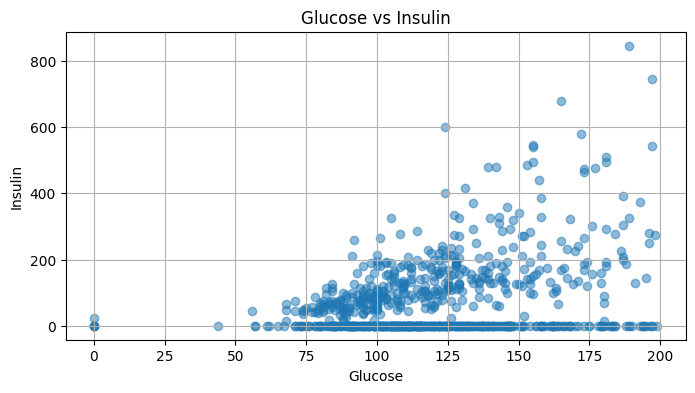

In [ ]:
plt.figure(figsize = (8,4))
plt.scatter(glucose_insulin_df["Glucose"], glucose_insulin_df["Insulin"],alpha = 0.5)
plt.title("Glucose vs Insulin")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.grid(True)
plt.show()

In [ ]:
df_BMI = df.copy()
df_BMI.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Engineering

In [ ]:
bmi_bins = [0, 18.5, 25, 30, 35, 40, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class 1', 'Obese Class 2', 'Obese Class 3']
df_BMI['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

In [ ]:
df_BMI.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148,72,35,0,33.6,0.627,50,1,Obese Class 1
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obese Class 3


In [ ]:
bmi_dibetes_cases = {}
bmi_total_cases = {}
for label in bmi_labels:
  subset_df = df_BMI[df_BMI["BMI_Category"]== label]
  bmi_dibetes_cases[label] = len(subset_df[subset_df["Outcome"]== 1])
  bmi_total_cases[label] = len(subset_df)
for label in bmi_labels:
  print("{}:{} diabetes cases of {} total recorded data".format(label,bmi_dibetes_cases[label], bmi_total_cases[label]))

Underweight:0 diabetes cases of 4 total recorded data
Normal:7 diabetes cases of 108 total recorded data
Overweight:44 diabetes cases of 180 total recorded data
Obese Class 1:100 diabetes cases of 221 total recorded data
Obese Class 2:61 diabetes cases of 148 total recorded data
Obese Class 3:54 diabetes cases of 96 total recorded data


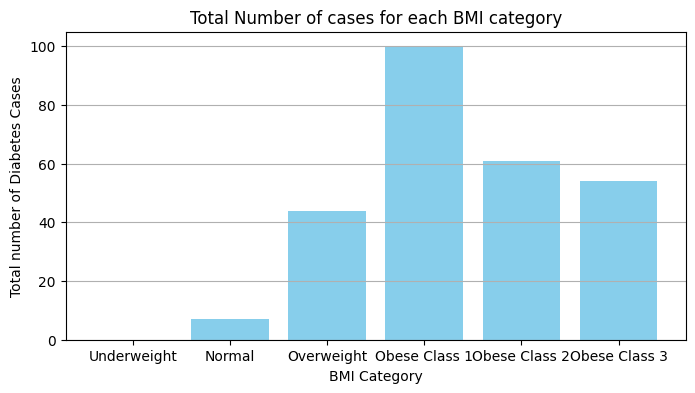

In [ ]:
plt.figure(figsize = (8,4))
plt.bar(bmi_dibetes_cases.keys(), bmi_dibetes_cases.values(), color = "skyblue")
plt.title("Total Number of cases for each BMI category")
plt.xlabel("BMI Category")
plt.ylabel("Total number of Diabetes Cases")
plt.xticks(rotation= 0)
plt.grid(axis = "y")
plt.show()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### SVM model to detect Diabetes

In [ ]:
model = SVC(kernel = "linear", C = 0.1, random_state = 42)
model.fit(x_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

### Created function for patient to enter data

In [ ]:
patient_data = {
    "Pregnancies" : None,
    "Glucose" : None,
    "BloodPressure" : None,
    "SkinThickness" : None,
    "Insulin" : None,
    "BMI" : None,
    "DiabetesPedigreeFunction" : None,
    "Age" : None
}

for feature in patient_data:
  patient_data[feature] = float(input("Enter {} for the patient:".format(feature)))

patient_df = pd.DataFrame(patient_data, index = [0])
prediction = model.predict(patient_df)
print("\nPatient Data")
print(patient_df)
if prediction[0] == 1:
  print("Diabetes Detected")
else:
  print("Normal")


Enter Pregnancies for the patient:2
Enter Glucose for the patient:175
Enter BloodPressure for the patient:203
Enter SkinThickness for the patient:57
Enter Insulin for the patient:88
Enter BMI for the patient:19
Enter DiabetesPedigreeFunction for the patient:0.76
Enter Age for the patient:38

Patient Data
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    175.0          203.0           57.0     88.0  19.0   

   DiabetesPedigreeFunction   Age  
0                      0.76  38.0  
Normal


### Xgboost model to detect Diabetes

In [ ]:
model_2 = xgb.XGBClassifier(random_state =42)
model_2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
patient_data = {
    "Pregnancies" : None,
    "Glucose" : None,
    "BloodPressure" : None,
    "SkinThickness" : None,
    "Insulin" : None,
    "BMI" : None,
    "DiabetesPedigreeFunction" : None,
    "Age" : None
}

for feature in patient_data:
  patient_data[feature] = float(input("Enter {} for the patient:".format(feature)))

patient_df = pd.DataFrame(patient_data, index = [0])
prediction = model_2.predict(patient_df)
print("\nPatient Data")
print(patient_df)
if prediction[0] == 1:
  print("Diabetes Detected")
else:
  print("Normal")


Enter Pregnancies for the patient:2
Enter Glucose for the patient:98
Enter BloodPressure for the patient:215
Enter SkinThickness for the patient:32
Enter Insulin for the patient:88
Enter BMI for the patient:34
Enter DiabetesPedigreeFunction for the patient:0.5
Enter Age for the patient:68

Patient Data
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0     98.0          215.0           32.0     88.0  34.0   

   DiabetesPedigreeFunction   Age  
0                       0.5  68.0  
Diabetes Detected


### KNN model to detect Diabetes

In [ ]:
model_3 = KNeighborsClassifier()
model_3.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
patient_data = {
    "Pregnancies" : None,
    "Glucose" : None,
    "BloodPressure" : None,
    "SkinThickness" : None,
    "Insulin" : None,
    "BMI" : None,
    "DiabetesPedigreeFunction" : None,
    "Age" : None
}

for feature in patient_data:
  patient_data[feature] = float(input("Enter {} for the patient:".format(feature)))

patient_df = pd.DataFrame(patient_data, index = [0])
prediction = model_3.predict(patient_df)
print("\nPatient Data")
print(patient_df)
if prediction[0] == 1:
  print("Diabetes Detected")
else:
  print("Normal")


Enter Pregnancies for the patient:1
Enter Glucose for the patient:126
Enter BloodPressure for the patient:112
Enter SkinThickness for the patient:9
Enter Insulin for the patient:2
Enter BMI for the patient:36
Enter DiabetesPedigreeFunction for the patient:0.1
Enter Age for the patient:23

Patient Data
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    126.0          112.0            9.0      2.0  36.0   

   DiabetesPedigreeFunction   Age  
0                       0.1  23.0  
Normal


In [ ]:
# def model_evaluation(data):
#   x = df.drop("Outcome", axis = 1)
#   y = df["Outcome"]
#   model = SVC(kernel = "linear", C = 0.1, random_state = 42)
#   cv_score = cross_val_score(model, x,y, cv = 5)
#   cv_predictions = cross_val_predict(model, x, y, cv = 5)
#   cv_accuracy = cv_score.mean()
#   cv_precision = precision_score(y, cv_predictions)
#   cv_recall = recall_score(y, cv_predictions)
#   print("Cross Validated Accuracy:", cv_accuracy)
#   print("Cross Validated Precision:", cv_precision)
#   print("Cross Validated Recall:", cv_recall)
# df = pd.read_csv("diabetes.csv")
# model_evaluation(df)
